In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 20 

In [3]:

data_r = np.loadtxt('./r.txt')
data_s = np.loadtxt('./s.txt')
data_c = np.loadtxt('./c.txt')
data_time = np.loadtxt('./time.txt')
print(data_time.shape)
print(data_r.shape)
print(data_s.shape)
print(data_c.shape)

(10000, 1001)
(10000, 1001)
(10000, 1001)
(10000, 1001)


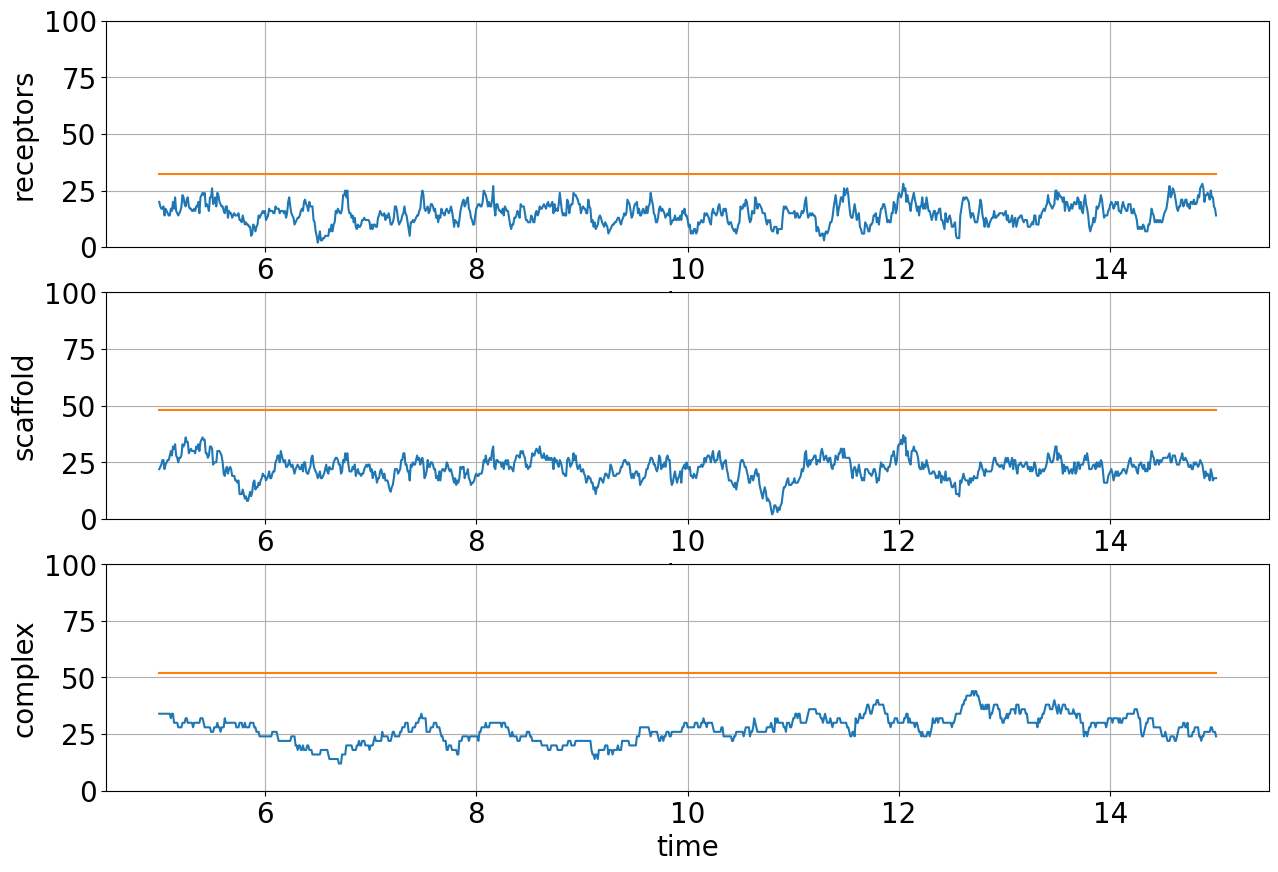

In [68]:
fig, axs = plt.subplots(3,figsize=(15, 10))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(data_time[1], data_r[1])
axs[0].plot(data_time[1], np.ones(np.size(data_time,1)) * 32.1)

axs[0].set_ylim([0, 100])
axs[0].set_xlabel(r'time')
axs[0].set_ylabel(r'receptors')

axs[1].plot(data_time[1], data_s[1])
axs[1].plot(data_time[1], np.ones(np.size(data_time,1)) * 48.2)

axs[1].set_ylim([0, 100])
axs[1].set_xlabel(r'time')
axs[1].set_ylabel(r'scaffold')

axs[2].plot(data_time[2], data_c[2])
axs[2].plot(data_time[2], np.ones(np.size(data_time,1)) * 51.77)

axs[2].set_ylim([0, 100])
axs[2].set_xlabel(r'time')
axs[2].set_ylabel(r'complex')
plt.show()

In [4]:
mean_r = np.mean(data_r,0)
mean_s = np.mean(data_s,0)
mean_c = np.mean(data_c,0)
std_r = np.std(data_r,0)
std_s = np.std(data_s,0)
std_c = np.std(data_c,0)
time = data_time[0]
print(mean_r.shape,std_r.shape)

(1001,) (1001,)


In [5]:
C_rs = np.corrcoef(data_r, data_s, rowvar=False)
C_rs

array([[ 1.        ,  0.84683277,  0.71902191, ..., -0.00366267,
        -0.00269801,  0.00110724],
       [ 0.84683277,  1.        ,  0.84953132, ..., -0.00296456,
        -0.00209429,  0.00138721],
       [ 0.71902191,  0.84953132,  1.        , ...,  0.01000448,
         0.01063936,  0.01089964],
       ...,
       [-0.00366267, -0.00296456,  0.01000448, ...,  1.        ,
         0.92741279,  0.86261309],
       [-0.00269801, -0.00209429,  0.01063936, ...,  0.92741279,
         1.        ,  0.92592856],
       [ 0.00110724,  0.00138721,  0.01089964, ...,  0.86261309,
         0.92592856,  1.        ]])

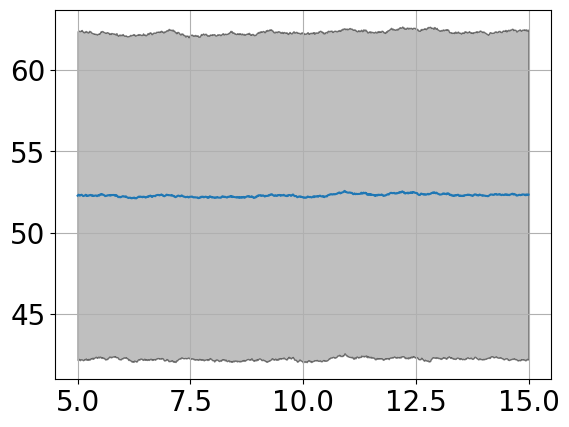

In [7]:
plt.plot(time, mean_c)
plt.fill_between(time, mean_c-std_c, mean_c+std_c,  facecolor = '0.5', edgecolor = '0', alpha = 0.5)
plt.show()

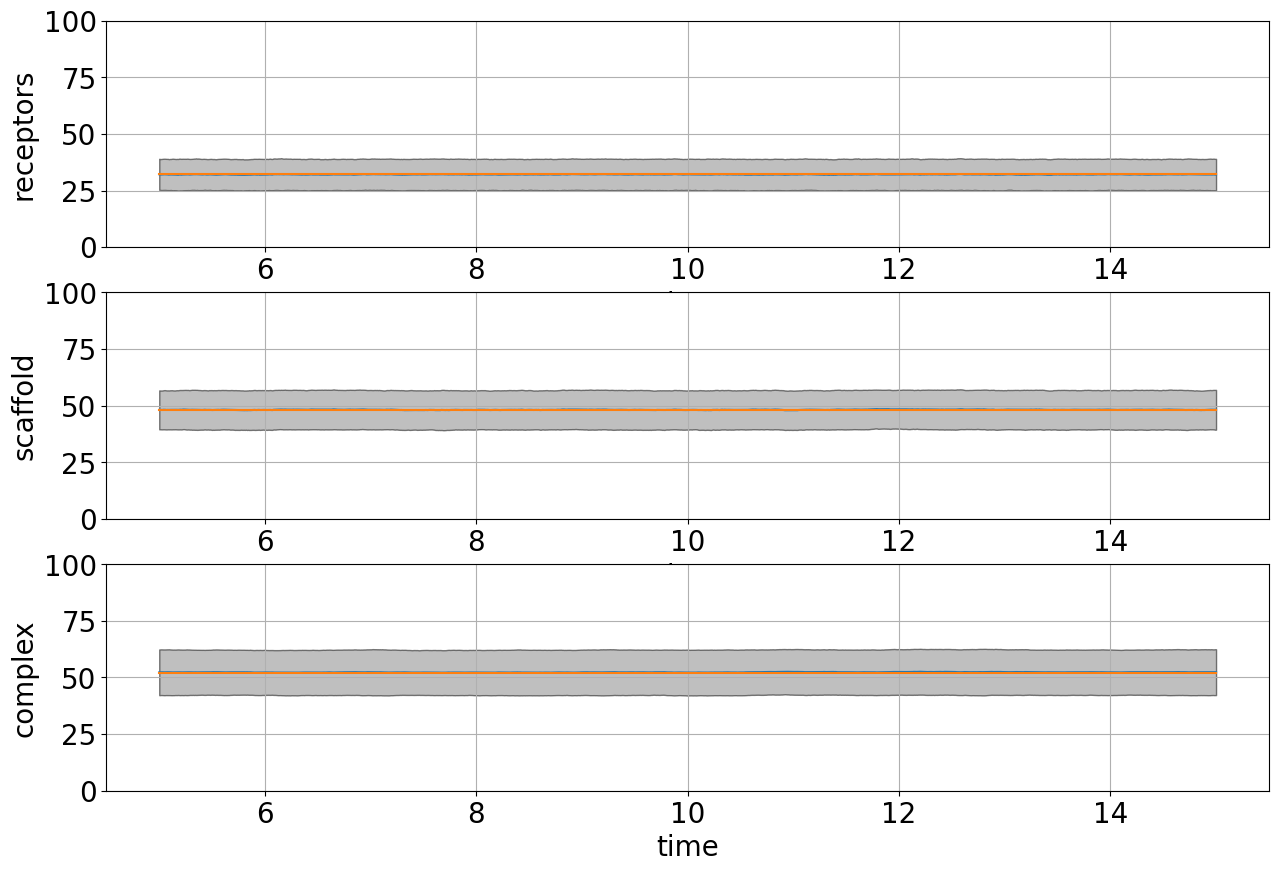

In [8]:
fig, axs = plt.subplots(3,figsize=(15, 10))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(time, mean_r)
axs[0].plot(time, np.ones(np.size(time)) * 32.1)
axs[0].fill_between(time, mean_r-std_r, mean_r+std_r,  facecolor = '0.5', edgecolor = '0', alpha = 0.5)

axs[0].set_ylim([0, 100])
axs[0].set_xlabel(r'time')
axs[0].set_ylabel(r'receptors')


axs[1].plot(time, mean_s)
axs[1].plot(time, np.ones(np.size(time)) * 48.2)
axs[1].fill_between(time, mean_s-std_s, mean_s+std_s,  facecolor = '0.5', edgecolor = '0', alpha = 0.5)

axs[1].set_ylim([0, 100])
axs[1].set_xlabel(r'time')
axs[1].set_ylabel(r'scaffold')

axs[2].plot(time, mean_c)
axs[2].plot(time, np.ones(np.size(time)) * 51.77)
axs[2].fill_between(time, mean_c-std_c, mean_c+std_c,  facecolor = '0.5', edgecolor = '0', alpha = 0.5)

axs[2].set_ylim([0, 100])
axs[2].set_xlabel(r'time')
axs[2].set_ylabel(r'complex')
plt.show()

In [6]:
C_rs = np.corrcoef(data_r, data_s, rowvar=False)
C_rc = np.corrcoef(data_r, data_c, rowvar=False)
C_cs = np.corrcoef(data_c, data_s, rowvar=False)


In [7]:
C_ss = np.corrcoef(data_s, rowvar=False)
print(std_r.shape, std_s.shape, std_c.shape)

(1001,) (1001,) (1001,)


In [8]:
C_rs_neg_time = np.copy(C_rs[1001,:1001])
C_rc_neg_time = np.copy(C_rc[1001,:1001])
C_cs_neg_time = np.copy(C_cs[1001,:1001])
time_cross = np.concatenate((np.flip(5. - time), time - 5.), axis=None)

In [9]:
Corr_rs = np.copy(C_rs[0,1001:])
Corr_rc = np.copy(C_rc[0,1001:])
Corr_cs = np.copy(C_cs[0,1001:])
Corr_r = np.copy(C_rs[0,:1001])
Corr_c = np.copy(C_rc[1001,1001:])
Corr_s = np.copy(C_cs[1001,1001:])
for k in range(1, 1000):
    C_rs_neg_time += np.concatenate((C_rs[(1001+k),k:1001],C_rs[1001,(1001-k):1001]), axis=None)
    C_rc_neg_time += np.concatenate((C_rc[(1001+k),k:1001],C_rc[1001,(1001-k):1001]), axis=None)
    C_cs_neg_time += np.concatenate((C_cs[(1001+k),k:1001],C_cs[1001,(1001-k):1001]), axis=None)
    Corr_rs += np.concatenate((C_rs[k,(1001+k):],C_rs[0,-k:]), axis=None)
    Corr_rc += np.concatenate((C_rc[k,(1001+k):],C_rc[0,-k:]), axis=None)
    Corr_cs += np.concatenate((C_cs[k,(1001+k):],C_cs[0,-k:]), axis=None)
    Corr_r += np.concatenate((C_rs[k,k:1001],C_rs[0,(1001-k):1001]), axis=None)
    Corr_c += np.concatenate((C_rc[(1001+k),(1001+k):],C_rc[1001,-k:]), axis=None)
    Corr_s += np.concatenate((C_cs[(1001+k),(1001+k):],C_cs[1001,-k:]), axis=None)
Corr_rs /= 1001.
Corr_rc /= 1001.
Corr_cs /= 1001.
Corr_r /= 1001.
Corr_c /= 1001.
Corr_s /= 1001.
C_rs_neg_time = np.flip(C_rs_neg_time) /1001.
C_rc_neg_time = np.flip(C_rc_neg_time) /1001.
C_cs_neg_time = np.flip(C_cs_neg_time) /1001.
C_rs_neg_time

array([-0.0052786 ,  0.00494652,  0.01370073, ...,  0.15155477,
        0.20585582,  0.27256299])

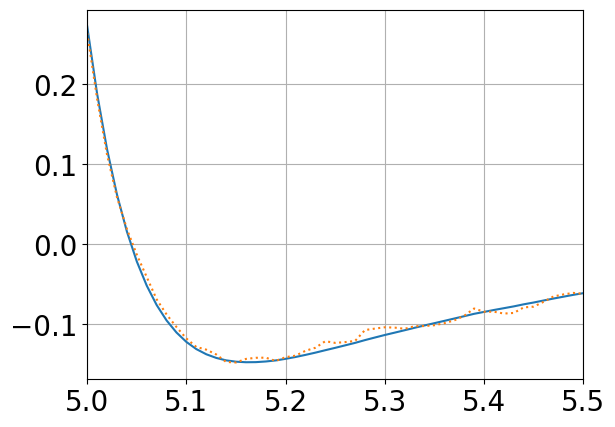

In [10]:
plt.plot(time, Corr_rs)
plt.plot(time, C_rs[0,1001:], linestyle = 'dotted')
plt.xlim([5,5.5])
plt.show()

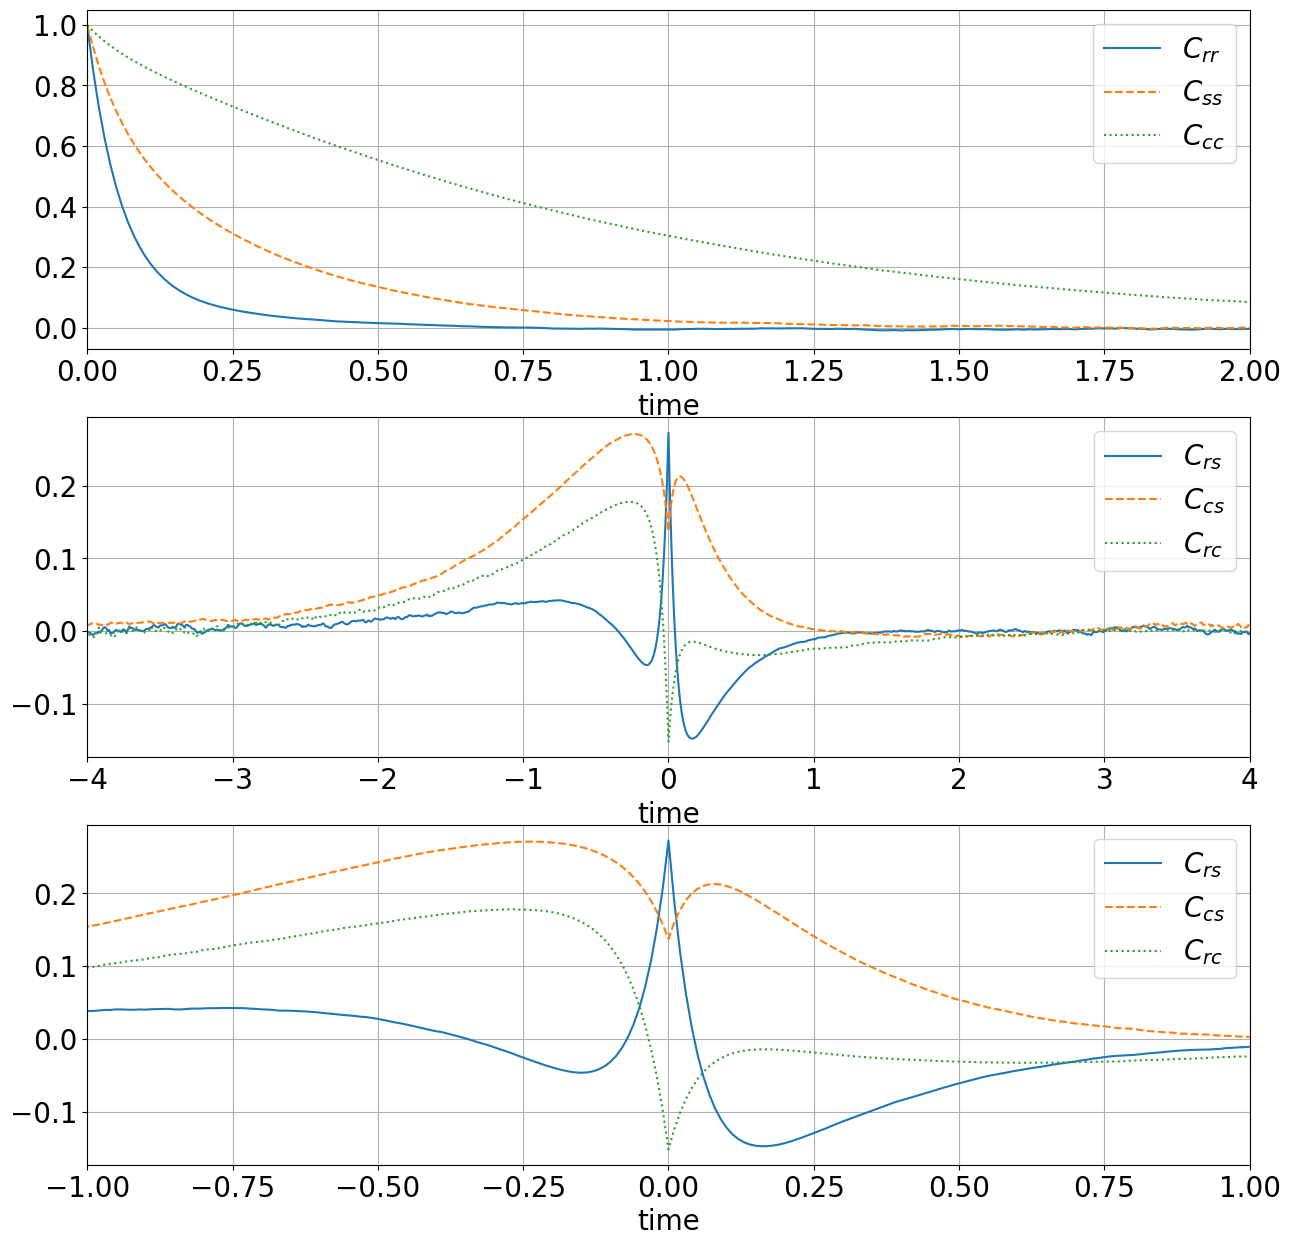

In [11]:
fig, axs = plt.subplots(3,figsize=(15, 15))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(time - 5, Corr_r, label = r"$C_{rr}$")
axs[0].plot(time - 5, Corr_s, linestyle = 'dashed', label = r"$C_{ss}$")
axs[0].plot(time - 5, Corr_c, linestyle = 'dotted', label = r"$C_{cc}$")

axs[0].set_xlabel(r'time')
axs[0].set_xlim([0, 2])
axs[0].legend()

axs[1].plot(time_cross, np.concatenate((C_rs_neg_time,np.array(Corr_rs)), axis=None), label = r"$C_{rs}$")
axs[1].plot(time_cross, np.concatenate((C_cs_neg_time,np.array(Corr_cs)), axis=None), linestyle = 'dashed', label = r"$C_{cs}$")
axs[1].plot(time_cross, np.concatenate((C_rc_neg_time,np.array(Corr_rc)), axis=None), linestyle = 'dotted', label = r"$C_{rc}$")

axs[1].legend()
axs[1].set_xlabel(r'time')
axs[1].set_xlim([-4, 4])

axs[2].plot(time_cross, np.concatenate((C_rs_neg_time,np.array(Corr_rs)), axis=None), label = r"$C_{rs}$")
axs[2].plot(time_cross, np.concatenate((C_cs_neg_time,np.array(Corr_cs)), axis=None), linestyle = 'dashed', label = r"$C_{cs}$")
axs[2].plot(time_cross, np.concatenate((C_rc_neg_time,np.array(Corr_rc)), axis=None), linestyle = 'dotted', label = r"$C_{rc}$")

axs[2].legend()
axs[2].set_xlabel(r'time')
axs[2].set_xlim([-1, 1])
plt.show()

In [12]:
S = data_s + data_c
R = data_r + 1.5 * data_s

In [13]:
C_RS = np.corrcoef(R, S, rowvar=False)
Corr_R = np.copy(C_RS[0,:1001])
Corr_S = np.copy(C_RS[1001,1001:])
Corr_RS = np.copy(C_RS[0,1001:])
Corr_RS_neg = np.copy(C_RS[1001,:1001])
Corr_RS, Corr_RS_neg

(array([ 0.60108198,  0.56871126,  0.53604139, ..., -0.0020269 ,
        -0.00204818, -0.00264179]),
 array([ 0.60108198,  0.56970896,  0.54886417, ..., -0.00575128,
        -0.0132532 , -0.019411  ]))

In [14]:
for k in range(1, 1000):
    Corr_R += np.concatenate((C_RS[k,k:1001],C_RS[0,(1001-k):1001]), axis=None)
    Corr_S += np.concatenate((C_RS[(1001+k),(1001+k):],C_RS[1001,-k:]), axis=None)
    Corr_RS += np.concatenate((C_RS[k,(1001+k):],C_RS[0,-k:]), axis=None)
    Corr_RS_neg += np.concatenate((C_RS[(1001+k),k:1001],C_RS[1001,(1001-k):1001]), axis=None)
Corr_R /= 1001.
Corr_S /= 1001.
Corr_RS /= 1001.
Corr_RS_neg = np.flip(Corr_RS_neg) / 1001.
Corr_RS, Corr_RS_neg

(array([ 0.59226432,  0.55475156,  0.52233776, ..., -0.00200994,
        -0.0020441 , -0.00263915]),
 array([-0.01939161, -0.01324408, -0.0057585 , ...,  0.54703574,
         0.56865195,  0.59226432]))

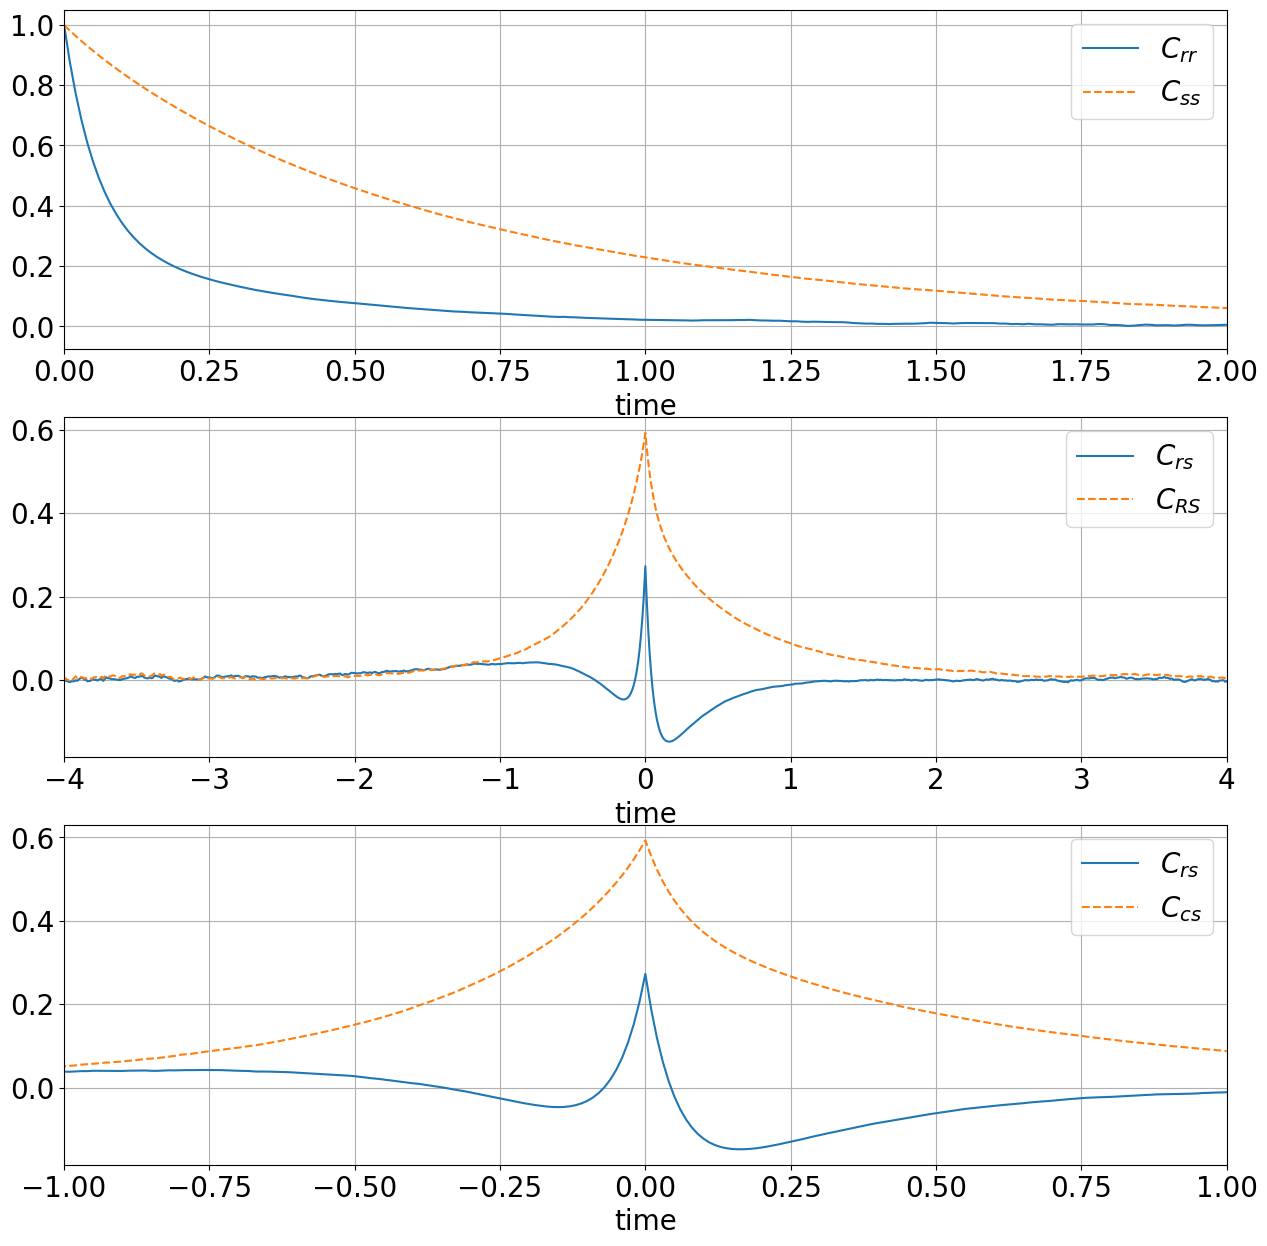

In [15]:
fig, axs = plt.subplots(3,figsize=(15, 15))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(time - 5, Corr_R, label = r"$C_{RR}$")
axs[0].plot(time - 5, Corr_S, linestyle = 'dashed', label = r"$C_{SS}$")

axs[0].set_xlabel(r'time')
axs[0].legend()
axs[0].set_xlim([0, 2])

axs[1].plot(time_cross, np.concatenate((C_rs_neg_time,np.array(Corr_rs)), axis=None), label = r"$C_{rs}$")
axs[1].plot(time_cross, np.concatenate((Corr_RS_neg,np.array(Corr_RS)), axis=None), linestyle = 'dashed', label = r"$C_{RS}$")

axs[1].legend()
axs[1].set_xlabel(r'time')
axs[1].set_xlim([-4, 4])

axs[2].plot(time_cross, np.concatenate((C_rs_neg_time,np.array(Corr_rs)), axis=None), label = r"$C_{rs}$")
axs[2].plot(time_cross, np.concatenate((Corr_RS_neg,np.array(Corr_RS)), axis=None), linestyle = 'dashed', label = r"$C_{cs}$")

axs[2].legend()
axs[2].set_xlabel(r'time')
axs[2].set_xlim([-1, 1])
plt.show()

In [16]:
np.shape(R)

(10000, 1001)

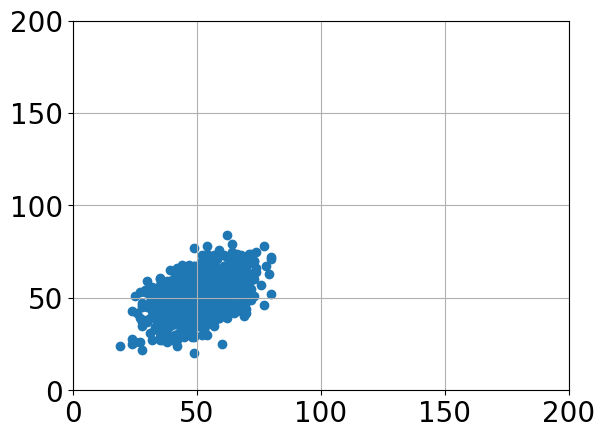

In [77]:
plt.scatter(S[:1000,0],S[:1000,50])
plt.xlim([0,200])
plt.ylim([0,200])

plt.show()

In [72]:
S_hist = np.copy(S)
S_hist = S_hist.flatten()
np.shape(S_hist)

(10010000,)

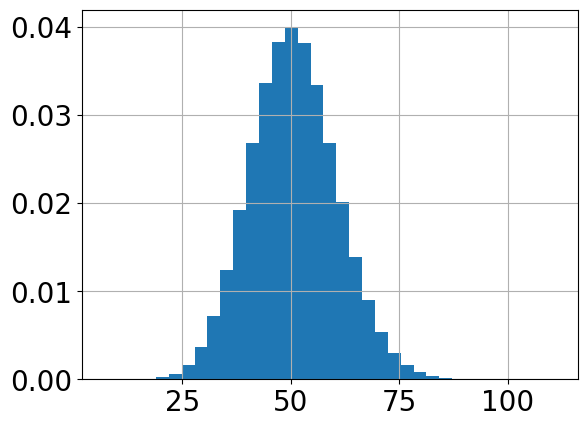

In [76]:
plt.hist(S_hist,bins=35,density=True)
plt.show()

In [1]:
def Crs_theo(t):
    return 0.0198485 * (
        23.546 * np.exp(-8.87663 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        0.859231 * np.exp(-1.56139 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) -
        0.281135 * np.exp(-0.654355 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) -
        2.3021 * np.exp(-8.87663 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        27.8477 * np.exp(-1.56139 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) +
        15.3611 * np.exp(-0.654355 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) +
        0.0681688 * np.exp(-8.87663 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) +
        1.3902 * np.exp(-1.56139 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) -
        1.37969 * np.exp(-0.654355 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t)))
    )

def Ccs_theo(t):
    return 0.0145953 * (
        -7.39325 * np.exp(-8.87663 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        1.14992 * np.exp(-1.56139 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) -
        1.15758 * np.exp(-0.654355 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        0.722839 * np.exp(-8.87663 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        37.269 * np.exp(-1.56139 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) +
        63.2497 * np.exp(-0.654355 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        0.0214044 * np.exp(-8.87663 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) +
        1.86053 * np.exp(-1.56139 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) -
        5.68091 * np.exp(-0.654355 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t)))
    )

def Crc_theo(t):
    return 0.0207944 * (
        -8.91704 * np.exp(-8.87663 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) -
        0.325396 * np.exp(-1.56139 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        0.106468 * np.exp(-0.654355 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        1.38693 * np.exp(-8.87663 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) +
        16.7772 * np.exp(-1.56139 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        9.25445 * np.exp(-0.654355 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        1.39617 * np.exp(-8.87663 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) -
        28.4728 * np.exp(-1.56139 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) +
        28.2574 * np.exp(-0.654355 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t)))
    )


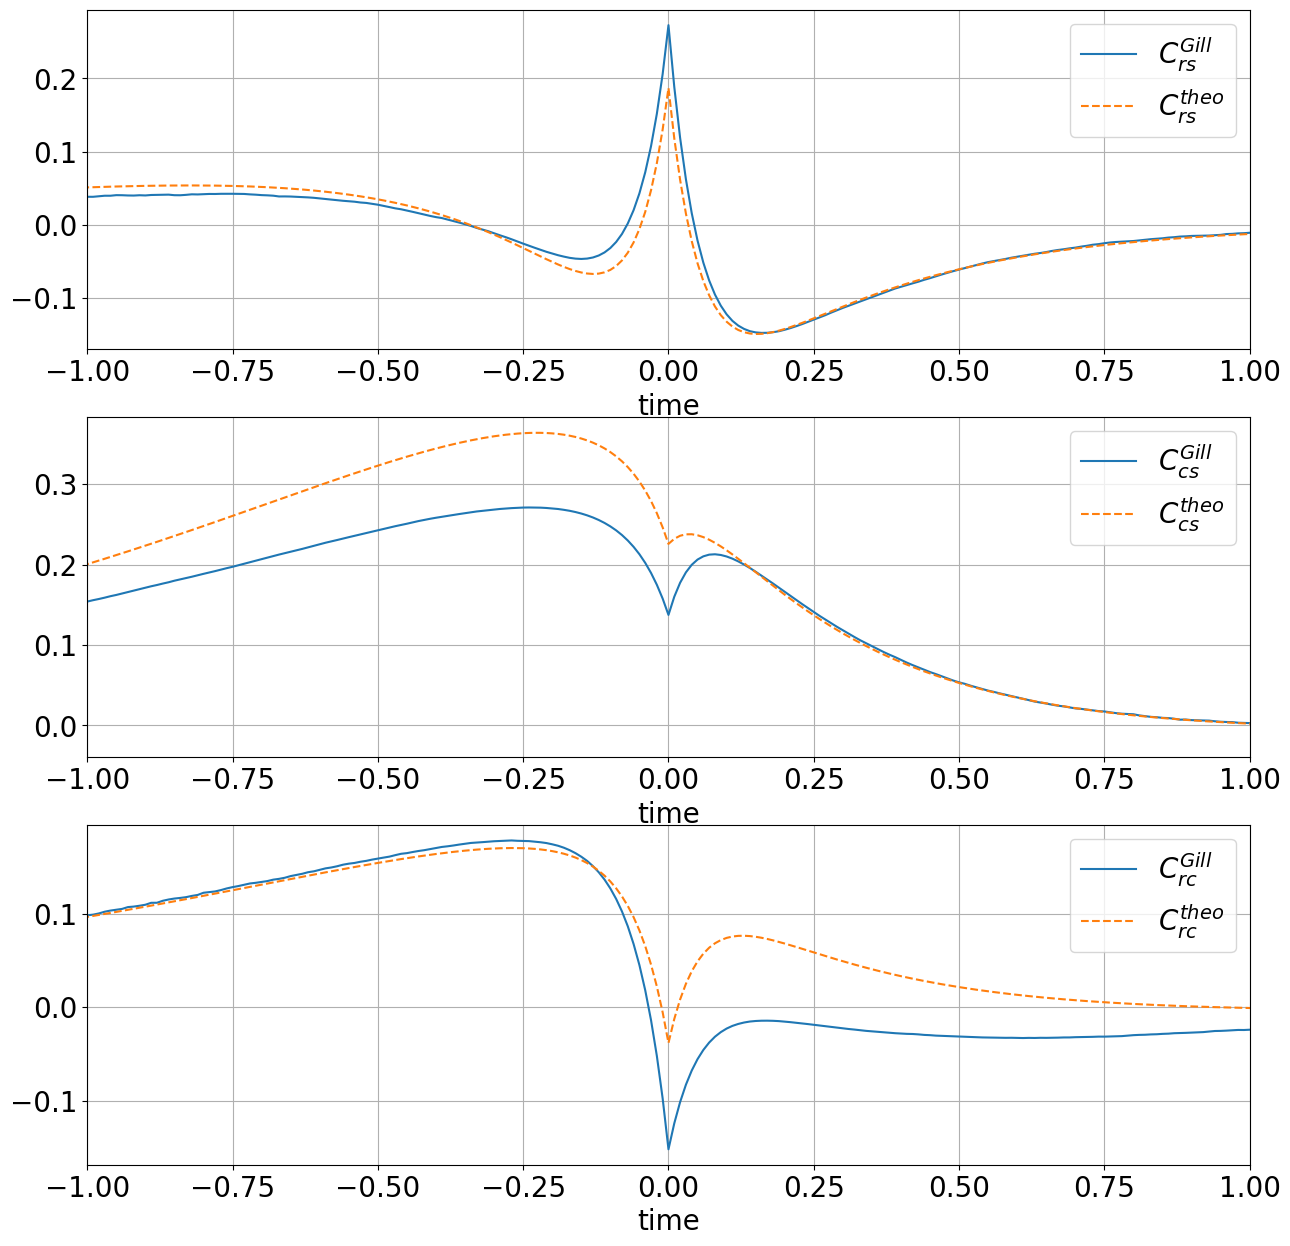

In [18]:
fig, axs = plt.subplots(3,figsize=(15, 15))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(time_cross, np.concatenate((C_rs_neg_time,np.array(Corr_rs)), axis=None), label = r"$C_{rs}^{Gill}$")
axs[0].plot(time_cross, Crs_theo(time_cross), linestyle = 'dashed', label = r"$C_{rs}^{theo}$")

axs[0].set_xlabel(r'time')
axs[0].legend()
axs[0].set_xlim([-1, 1])

axs[1].plot(time_cross, np.concatenate((C_cs_neg_time,np.array(Corr_cs)), axis=None), label = r"$C_{cs}^{Gill}$")
axs[1].plot(time_cross, Ccs_theo(time_cross), linestyle = 'dashed', label = r"$C_{cs}^{theo}$")

axs[1].legend()
axs[1].set_xlabel(r'time')
axs[1].set_xlim([-1, 1])

axs[2].plot(time_cross, np.concatenate((C_rc_neg_time,np.array(Corr_rc)), axis=None), label = r"$C_{rc}^{Gill}$")
axs[2].plot(time_cross, Crc_theo(time_cross), linestyle = 'dashed', label = r"$C_{rc}^{theo}$")

axs[2].legend()
axs[2].set_xlabel(r'time')
axs[2].set_xlim([-1, 1])
plt.show()

In [19]:
import numpy as np

def Crs_theo_corrected(t):
    return 0.0164609 * (
        34.7972 * np.exp(-8.87663 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        2.57553 * np.exp(-1.56139 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) -
        2.61376 * np.exp(-0.654355 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) -
        6.9005 * np.exp(-8.87663 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        29.2263 * np.exp(-1.56139 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) +
        17.7721 * np.exp(-0.654355 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) +
        0.633778 * np.exp(-8.87663 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) +
        1.60841 * np.exp(-1.56139 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) -
        1.83817 * np.exp(-0.654355 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t)))
    )

def Ccs_theo_corrected(t):
    return 0.0114205 * (
        -10.926 * np.exp(-8.87663 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        3.44687 * np.exp(-1.56139 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) -
        10.7623 * np.exp(-0.654355 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        2.1667 * np.exp(-8.87663 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        39.114 * np.exp(-1.56139 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) +
        73.1775 * np.exp(-0.654355 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        0.199001 * np.exp(-8.87663 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) +
        2.15256 * np.exp(-1.56139 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) -
        7.56872 * np.exp(-0.654355 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t)))
    )

def Crc_theo_corrected(t):
    return 0.0144013 * (
        -13.1779 * np.exp(-8.87663 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) -
        0.97537 * np.exp(-1.56139 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        0.989848 * np.exp(-0.654355 * (-t + np.abs(t)) - 8.87663 * (t + np.abs(t))) +
        4.15729 * np.exp(-8.87663 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) +
        17.6077 * np.exp(-1.56139 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        10.707 * np.exp(-0.654355 * (-t + np.abs(t)) - 1.56139 * (t + np.abs(t))) -
        12.9804 * np.exp(-8.87663 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) -
        32.9419 * np.exp(-1.56139 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t))) +
        37.6475 * np.exp(-0.654355 * (-t + np.abs(t)) - 0.654355 * (t + np.abs(t)))
    )

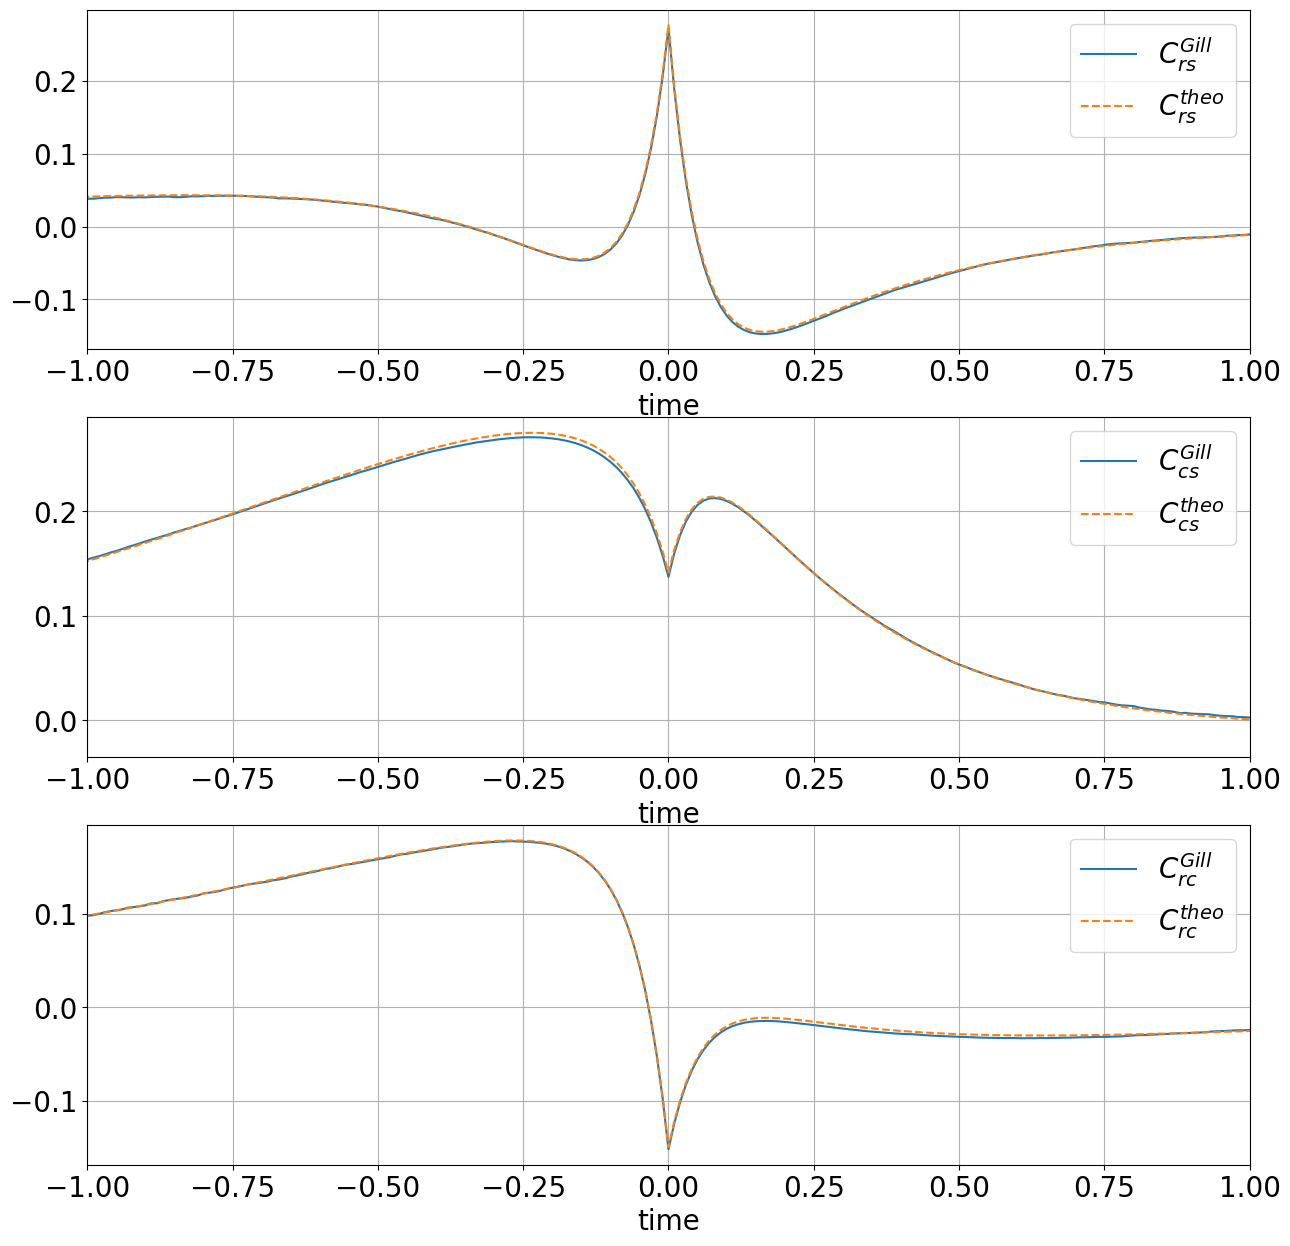

In [20]:
fig, axs = plt.subplots(3,figsize=(15, 15))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(time_cross, np.concatenate((C_rs_neg_time,np.array(Corr_rs)), axis=None), label = r"$C_{rs}^{Gill}$")
axs[0].plot(time_cross, Crs_theo_corrected(time_cross), linestyle = 'dashed', label = r"$C_{rs}^{theo}$")

axs[0].set_xlabel(r'time')
axs[0].legend()
axs[0].set_xlim([-1, 1])

axs[1].plot(time_cross, np.concatenate((C_cs_neg_time,np.array(Corr_cs)), axis=None), label = r"$C_{cs}^{Gill}$")
axs[1].plot(time_cross, Ccs_theo_corrected(time_cross), linestyle = 'dashed', label = r"$C_{cs}^{theo}$")

axs[1].legend()
axs[1].set_xlabel(r'time')
axs[1].set_xlim([-1, 1])

axs[2].plot(time_cross, np.concatenate((C_rc_neg_time,np.array(Corr_rc)), axis=None), label = r"$C_{rc}^{Gill}$")
axs[2].plot(time_cross, Crc_theo_corrected(time_cross), linestyle = 'dashed', label = r"$C_{rc}^{theo}$")

axs[2].legend()
axs[2].set_xlabel(r'time')
axs[2].set_xlim([-1, 1])
plt.show()

In [22]:
data_r_d = np.loadtxt('./r_d.txt')
data_s_d = np.loadtxt('./s_d.txt')
data_c_d = np.loadtxt('./c_d.txt')
print(data_r_d.shape)
print(data_s_d.shape)
print(data_c_d.shape)

(10000, 1001)
(10000, 1001)
(10000, 1001)


In [23]:
C_rs = np.corrcoef(data_r_d, data_s_d, rowvar=False)
C_rc = np.corrcoef(data_r_d, data_c_d, rowvar=False)
C_cs = np.corrcoef(data_c_d, data_s_d, rowvar=False)
C_rs_neg_time_d = np.copy(C_rs[1001,:1001])
C_rc_neg_time_d = np.copy(C_rc[1001,:1001])
C_cs_neg_time_d = np.copy(C_cs[1001,:1001])
time_cross = np.concatenate((np.flip(5. - time), time - 5.), axis=None)
Corr_rs_d = np.copy(C_rs[0,1001:])
Corr_rc_d = np.copy(C_rc[0,1001:])
Corr_cs_d = np.copy(C_cs[0,1001:])
Corr_r = np.copy(C_rs[0,:1001])
Corr_c = np.copy(C_rc[1001,1001:])
Corr_s = np.copy(C_cs[1001,1001:])
for k in range(1, 1000):
    C_rs_neg_time_d += np.concatenate((C_rs[(1001+k),k:1001],C_rs[1001,(1001-k):1001]), axis=None)
    C_rc_neg_time_d += np.concatenate((C_rc[(1001+k),k:1001],C_rc[1001,(1001-k):1001]), axis=None)
    C_cs_neg_time_d += np.concatenate((C_cs[(1001+k),k:1001],C_cs[1001,(1001-k):1001]), axis=None)
    Corr_rs_d += np.concatenate((C_rs[k,(1001+k):],C_rs[0,-k:]), axis=None)
    Corr_rc_d += np.concatenate((C_rc[k,(1001+k):],C_rc[0,-k:]), axis=None)
    Corr_cs_d += np.concatenate((C_cs[k,(1001+k):],C_cs[0,-k:]), axis=None)
    Corr_r += np.concatenate((C_rs[k,k:1001],C_rs[0,(1001-k):1001]), axis=None)
    Corr_c += np.concatenate((C_rc[(1001+k),(1001+k):],C_rc[1001,-k:]), axis=None)
    Corr_s += np.concatenate((C_cs[(1001+k),(1001+k):],C_cs[1001,-k:]), axis=None)
Corr_rs_d /= 1001.
Corr_rc_d /= 1001.
Corr_cs_d /= 1001.
Corr_r /= 1001.
Corr_c /= 1001.
Corr_s /= 1001.
C_rs_neg_time_d = np.flip(C_rs_neg_time_d) /1001.
C_rc_neg_time_d = np.flip(C_rc_neg_time_d) /1001.
C_cs_neg_time_d = np.flip(C_cs_neg_time_d) /1001.
C_rs_neg_time

array([-0.0052786 ,  0.00494652,  0.01370073, ...,  0.15155477,
        0.20585582,  0.27256299])

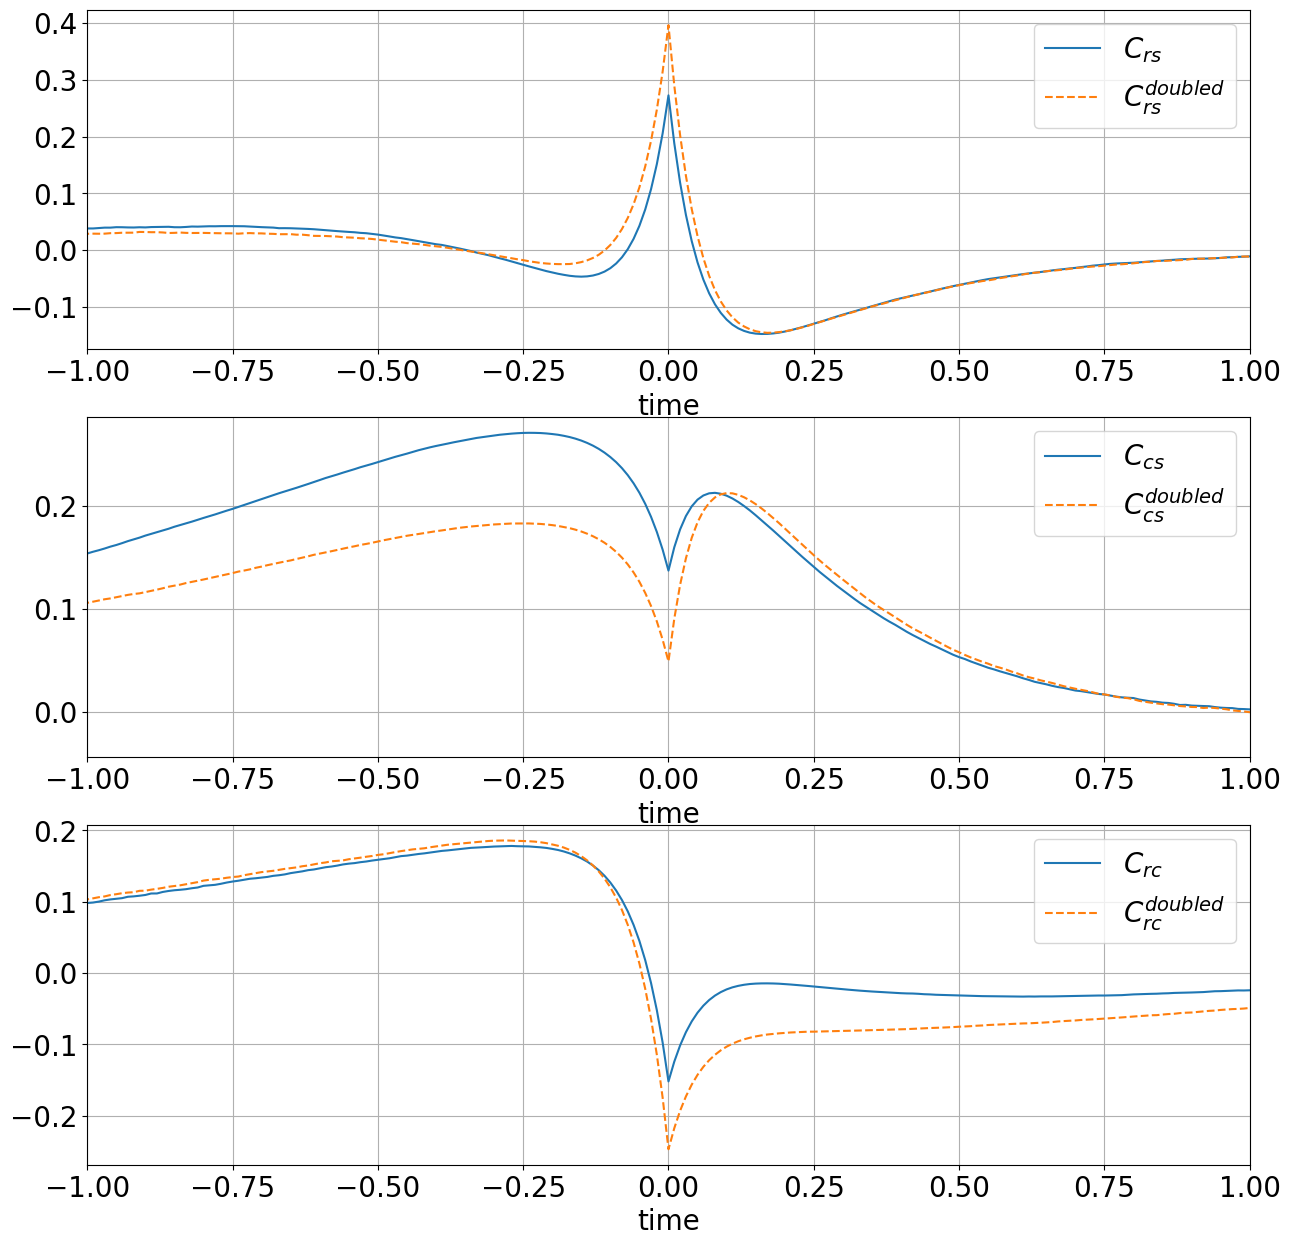

In [24]:
fig, axs = plt.subplots(3,figsize=(15, 15))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(time_cross, np.concatenate((C_rs_neg_time,np.array(Corr_rs)), axis=None), label = r"$C_{rs}$")
axs[0].plot(time_cross, np.concatenate((C_rs_neg_time_d,np.array(Corr_rs_d)), axis=None), linestyle = 'dashed', label = r"$C_{rs}^{doubled}$")

axs[0].set_xlabel(r'time')
axs[0].legend()
axs[0].set_xlim([-1, 1])

axs[1].plot(time_cross, np.concatenate((C_cs_neg_time,np.array(Corr_cs)), axis=None), label = r"$C_{cs}$")
axs[1].plot(time_cross, np.concatenate((C_cs_neg_time_d,np.array(Corr_cs_d)), axis=None), linestyle = 'dashed', label = r"$C_{cs}^{doubled}$")

axs[1].legend()
axs[1].set_xlabel(r'time')
axs[1].set_xlim([-1, 1])

axs[2].plot(time_cross, np.concatenate((C_rc_neg_time,np.array(Corr_rc)), axis=None), label = r"$C_{rc}$")
axs[2].plot(time_cross, np.concatenate((C_rc_neg_time_d,np.array(Corr_rc_d)), axis=None), linestyle = 'dashed', label = r"$C_{rc}^{doubled}$")

axs[2].legend()
axs[2].set_xlabel(r'time')
axs[2].set_xlim([-1, 1])
plt.show()